# órdenes mayores de precisición.
Ver notas de clase pagina 154.

## Ecuaciones de advecci'on
### Motivacion.
La Ecuacion de onda es

$$
\frac{\partial^2 u}{\partial x^2} - \frac{1}{c^2(x)} \frac{\partial^2 u}{\partial t^2}  \equiv
\left  (  \frac{\partial}{\partial x} - \frac{1}{c(x)} \frac{\partial}{\partial t}  \right )
\left  (  \frac{\partial}{\partial x} + \frac{1}{c(x)} \frac{\partial}{\partial t}  \right ) u(x,t) = 0
 $$
 Esto implica dos ecuaciones


$$
\frac{\partial u}{\partial x} + \frac{1}{c(x)} \frac{\partial u}{\partial t} = 0
\quad , \quad \frac{\partial u}{\partial x} - \frac{1}{c(x)} \frac{\partial u}{\partial t} = 0  \tag{1}
$$

A estas ecuaciones se les llama de **adveccion** (advection).  La una representa un pulso viajando a la izquierda y la otra un pulso viajando a la derecha.

Asumamos $c>0$ constante y $x=[a,b]$, $a,b \in \mathbb{R}$, $a \ne b$
Las soluciones de (1) son de la forma

$$ u_{-}(x,t) = f(x-ct) \quad , \quad u_{+}(x,t) = f(x+ct) \tag{2} $$

Tomando derivadas en  $x,t$, pensemos en $u_{-}= u$

$u_x = f'(x-ct) \quad  , \quad u_t=-f'(x - ct)c $

De forma que se verifica que

$$u_x + u_t/c=0 $$
satisface le Ecuacion (1) parte izquierda.
De igual forma si llamamos $u=u_{+}$, entonces $u_+(x,t)$ satisface la segunda de las ecuaciones en (1) .


Vamos a trabajar con la solucion $u_{-}$, el $u_+$ se deja al estudiante.

Asumamos una condicion inicial $u(x,t_0)=f(x - ct_0)= p(x)$. $p$ de pulso.

Debemos escoger condiciones de frontera **consistentes** con esta condicion inicial.  Por ejemplo en $x=a$

$$u(a,t) = f(a - ct) = f(a + c t_0 -c t_0 - ct) = f(a + c (t_0 -t) - ct_0)
=p(a + c(t_0-t) $$
De igual forma debemos escoger condiciones de frontera en $x=b$ consistentes con la inicial

$$u(b,t) = f(b -ct) = f( b + ct_0 - c t_0 - ct) = f(b + c(t_0 -t) - c t_0) = p(b + c(t_0 -t)) $$

En resumen debemos resolver

$$ u_x + \frac1c  u_t = 0 \tag{3} $$
Con las siguiente condiciones iniciales y de frontera
$$u(x,t_0) = p(x) \quad , \quad u(a,t) = p[ a + c(t_0 -t)] \quad , \quad u(b,t) = p[b + c(t_0 - t) ]  $$

Lo que hicimos lo hicimos con $u_-$, ahora veamos con $u=u_+$
Si tomamos la segunda ecuacion de (2). $u(x,t) = f(x+ ct)$.

$u_x = f'(x + ct)$  ahora $u_t=c f'(x+ct)$
En este caso $u$ corresponde a la solucion de la segunda ecuacion en (1).
Es decir,

$$u_x - \frac1c u_t = 0 $$

El mismo analisis de la condicion inicial.
Sea esta $u(x, t_0)= p(x)=f(x + c t_0)$. Consistente con esta condicion inicial deben haber dos condiciones de frontera.

1. $x=a$
$$u(a,t) = f(a + ct) = f(a - ct_0 + c t_0 + ct) = f[ a - c(t_0-c) + c t_0] = p(a + c(t_0 - c) ) $$

2. $x=b$
$$u(a,t) = f(b + ct) = f(b - ct_0 + c t_0 + ct) = f[ b - c(t_0-c) + c t_0] = p(b + c(t_0 - c) ) $$

Esto es consistente con la solucion del siguiente problema

$$u_x - \frac1c  u_t = 0 $$
Con condiciones iniciales y de frontera
$$u(x,t_0) = p(x) \quad , \quad u(a,t) = p(a - c(t_0 - t)) \quad , \quad u(b,t) = p[b - (t_0 - t)]  $$

El algoritmos si lo vamos a haxcer solo para $u_+$

Discretizamos el sistema (3)

Tratemos progresivas en tiempo y centradas en espacio FTCS

$$\frac{w_{i j+1} - w_{ij}}{\Delta t}= -c \frac{w_{i+1 j}-w_{i-1 j}}{2 \Delta x} \tag{4}$$
Como siempre llamamos $\gamma$ al CFL es decir $\gamma= c \Delta t/\Delta x$
Despejamos $w_{i j+1}$ de $(4)

$$w_{i j+1} = -\frac12 \gamma ( w_{i+1 j} - w_{i-1 j}) + w_{ij} \tag{4b}$$


Antes de cualquier cosa debemos probar si este sistema es estable.
Usamos el metodo de Von Neumann. Recuerde $w_{ij}=\mathrm{e}^{\mathrm{i} \omega t_j} \mathrm{e}^{\mathrm{i} k x_i} $
Dividimos por $w_{ij}$ para estudiar el factor de ganancia $G$

$$\mathrm{e}^{\mathrm{i} \omega \Delta t} = -\frac12 \gamma
\left ( \mathrm{e}^{\mathrm{i} k \Delta x}  - \mathrm{e}^{-\mathrm{i} k \Delta x} \right ) + 1 \tag{5} $$

Recuerde las identidades de Euler.
$$\mathrm{e}^{\mathrm{i} \theta}  - \mathrm{e}^{-\mathrm{i} \theta} =2 \mathrm{i} \sin \theta$$
$$ \mathrm{e}^{\mathrm{i} \theta} = \cos \theta + \mathrm{i} \sin \theta \tag{6}$$
Entonces de (5)


$$G = \mathrm{e}^{\mathrm{i} \Delta t} = - \gamma \mathrm{i} \sin k \Delta x + 1 $$

$$| G |  = \sqrt{1 + \gamma^2 \sin^2 k \Delta x} $$
Pero este numero es $\ge 1$. $>1$ para casi todos los casos, excepto $k=0$.

Entonces el sistema (4b) es incondicionalemte inestable.

Debemos buscar otro metodo. Pensemos en el sistema de diferencias progresivas tanto en tiempo como en espacio

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = - c \frac{w_{i+1 j} - w_{ij}}{\Delta x} $$

Despejamos $w_{i j+1}$

$$w_{i j+1} = - \gamma ( w_{i+1 j} - w_{ij}) + w_{ij} $$
Lo podemos reescribir como
$$w_{i j+1} = - \gamma w_{i+1 j} + (1 + \gamma) w_{ij}$$

Ahora pensaos en von Neumann, $w_{ij}= \mathrm{e}^{\mathrm{i} \omega t_j} \mathrm{e}^{\mathrm{i} k x_i} $. Dividimos por $w_{ij}$

Usando la segunda identidad de Euler (6)
$$G = \mathrm{e}^{\mathrm{i} \Delta t} = -\gamma \mathrm{e}^{\mathrm{i} k \Delta x} + (1 +\gamma) =  -\gamma \cos k \Delta x + 1 + \gamma - \mathrm{i} \gamma \sin k \Delta x$$

$$|G| = | \mathrm{e}^{\mathrm{i} \omega \Delta t} | = \sqrt{(1 + \gamma - \gamma \cos k \Delta x)^2 + \gamma^2 \sin^2 k \Delta x} $$
El unico caso en que $|G|=1$ es cuando $k=0$, de resto $|G|>1$.
El sistema es incondicionalmente inestable.

Hay muchos por probar. Ver la seccion de problemas (2.2.4). Ah'i hay 3 sistemas estables. Pero escojamos otro. Crank-Nicholson. Es centradas en espacio y promediadas $j, j+1$ en tiempo

$$w_{i j+1} = -\frac{\gamma}{4} (w_{i+1 j+1} - w_{i-1 j+1}) - \frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j})  + w_{ij} \tag{7}$$
Se deja como ejercicio verificar que esto viene de $u_x + u_t/c=0$

Usamos von Neumann.

\begin{eqnarray} G &=& \mathrm{e}^{\mathrm{i} \omega \Delta t} = -\frac{\gamma}{4} ( \mathrm{e}^{\mathrm{i} \omega \Delta t + k \Delta x} - \mathrm{e}^{\mathrm{i} \omega \Delta t - k \Delta x} + \mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x})  + 1   \\
&=&-\frac{\gamma}{4} ( 2 \mathrm{i} \mathrm{e}^{\mathrm{i} \omega \Delta t} \sin k \Delta x + 2 \mathrm{i} \sin k \Delta x) + 1 \\
\mathrm{e}^{i \omega \Delta t} \left ( 1 + \frac{\gamma}{2} \mathrm{i} \sin k \Delta x \right ) &=& 1 - \frac{\gamma}{2} \mathrm{i} \sin k \Delta x
\end{eqnarray}

De donde

$$\mathrm{e}^{\mathrm{i} \omega \Delta t} = \frac{1 - \mathrm{i} \frac{\gamma}{2} \sin k \Delta x}{1 + \mathrm{i} \frac{\gamma}{2} \sin k \Delta x } $$

$|G| = 1$.

El sistema is incondicionalmenteestable.
Segunda parte implementaci'on en `python`



$$-\frac{\gamma}{4} w_{i-1 j+1} + w_{i j+1} + \frac{\gamma}{4} w_{i+1 j+1} = \frac{\gamma}{4} w_{i-1 j} + w_{ij} - \frac{\gamma}{4} w_{i+1 j} . $$


Llevamos esto a forma matricial pero necesitamos condicion inicial y bordos.
$j=0, w_{i0}=p_i$
Para las condiciones de frontera
$$w_{0j} = e_j \quad , \quad w_{nx-1 j}= f_j $$

Tomemos $i=1$

$$-\frac{\gamma}{4} w_{0 j+1} + w_{1 j+1} + \frac{\gamma}{4} w_{2 j+1} = \frac{\gamma}{4} w_{0 j} + w_{1j} - \frac{\gamma}{4} w_{2 j} . $$

Reorgamizmos
* $i=1$
$$w_{1 j+1} + \gamma_{2 j+1} = w_{1j} -  \frac{\gamma}{4} w_{2j} + \frac{\gamma}{4} w_{0 j+1}  + \frac{\gamma}{4} w_{0j} $$


* $i=n-2$

$$-\frac{\gamma}{4} w_{n-3 j+1} + w_{n-2 j+1} + \frac{\gamma}{4} w_{n-1 j+1} = \frac{\gamma}{4} w_{n-3 j} + w_{n-2j} - \frac{\gamma}{4} w_{n-1 j} . $$

Puedo regorginanizar

$$-\frac{\gamma}{4} w_{n-3 j+1} + w_{n-2 j+1} =\frac{\gamma}{4} w_{n-3 j} + w_{n-2 j} - \frac{\gamma}{4} w_{n-1 j+1}  - \frac{\gamma}{4} w_{n-1 j}$$



El sistema es matricial de la forma

$$A w_{j+1} = B w_j + b $$
donde

$$
A = \begin{pmatrix}
1 & \frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
-\frac{\gamma}{4} & 1 & \frac{\gamma}{4} & 0 & \cdots & 0  \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots  \\
0 & 0 & \cdots & \cdots & - \frac{\gamma}{4} & 1
\end{pmatrix}
\quad , \quad
w_{j+1} =
\begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots  \\
\vdots \\
\vdots \\
w_{n-2 j+1}
\end{pmatrix}
\\
B = \begin{pmatrix}
1 & -\frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
\frac{\gamma}{4} & 1 & -\frac{\gamma}{4} & 0 & \cdots & 0  \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots  \\
0 & 0 & \cdots &  \cdots &  \frac{\gamma}{4} & 1 &
\end{pmatrix}
\quad , \quad
w_{j} =
\begin{pmatrix}
w_{1 j} \\
w_{2 j} \\
\vdots  \\
\vdots \\
\vdots \\
w_{n-2 j}
\end{pmatrix}
\quad , \quad
b =
\frac{\gamma}{4}
\begin{pmatrix}
w_{0 j+1} + w_{0j} \\
0 \\
\vdots \\
0 \\
-w_{n-1 j+1} - w_{n-1 j}
\end{pmatrix}
$$

Tenemos

$$x \in [0, L] \quad L=1, \quad c=1, t_0=0, a=0, b=1  $$
$$e(t) = u(0,t)= p(-ct) $$
$$f(t) = u(1,t)= p(1-ct) $$

In [1]:
# programa en python.
# import libraries
import numpy as np
import matplotlib.pyplot as plt

def solve_adevec(c, t0, a, b, nt, nx, dt, p, cb):
    L  = float(b-a)
    dx = L/(nx-1)
    gamma = c*dt/dx

    tmax = nt*dt + t0
    w = np.zeros((nx,nt))
    X = np.linspace(a,b,nx)

    # print dimensios of w
    print("dimensions of w", w.shape)

    # condiciones de frontera
    for j in range(nt):
        w[0, j]  = p(a - c*(j*dt - t0))
        w[nx-1,j] = p(b - c*(j*dt - t0))

    # inicilizacion lado derecho
    rhs = np.zeros(nx-2)

    # inicializacion matrices A, B, vector b
    A = np.zeros((nx-2, nx-2))
    B = np.zeros((nx-2, nx-2))
    b = np.zeros(nx-2)

    # condicion incial
    w[:, 0] = np.array([p(x - c*t0) for x in X])

    # lleno de matrices A, B
    for i in range(0, nx-2):
        A[i,i]=1.0
        B[i,i]=1.0
        if i > 0:
            A[i,i-1] = -gamma/4.0
            B[i,i-1] = gamma/4.0
        if i < nx-3:
            A[i,i+1] = gamma/4.0
            B[i,i+1] = -gamma/4.0

    b[0] = 0.25*gamma*(w[0,1] + w[0,0])
    b[nx-3] = -0.25*gamma*(w[nx-1,1] + w[nx-1,0])

    # print("A", A)
    # print("B", B)
    # print("b", b)


    # vector del rhs, t=0, j=0
    rhs = B.dot(w[1:-1, 0]) + b

    # ciclo sobre tiempos
    for j in range(1, nt-1):
        # resuelva A w_j+1 = rhs
        x = np.linalg.solve(A, rhs)
        rhs = B.dot(x) + b

        # rotacion
        for i in range(nx-2):
            w[i+1, j+1] = x[i]

        # bordos
        b[0] = 0.25*gamma*(w[0, j+1] + w[0, j])
        b[nx-3] = -0.25*gamma*( w[nx-1,j] + w[nx-1, j+1])

    return w
    # cross fingers.

In [2]:
# prueba numerica
# velocidad
v=1.0

# condiciones de borde e iniciales en 0
def e(x):
    return 0

# p
def p(x):
    return np.exp(-400*(x-0.5)**2)

def q(x):
    return 0

dt=0.001
nt=1001
nx=501
a=0
b=1
t0=0
cb=0

w = solve_adevec(v, t0, a, b, nt, nx, dt, p, cb)

dimensions of w (501, 1001)


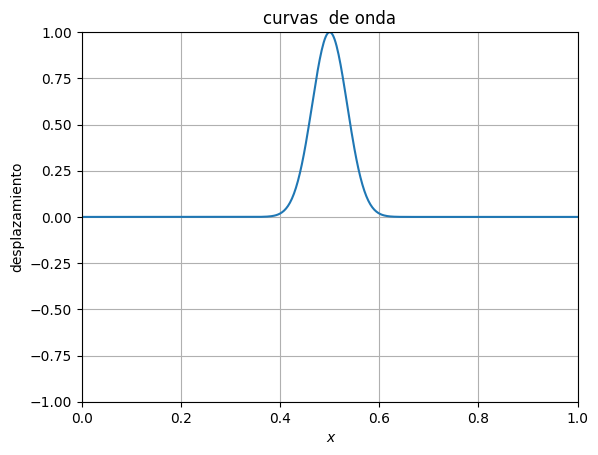

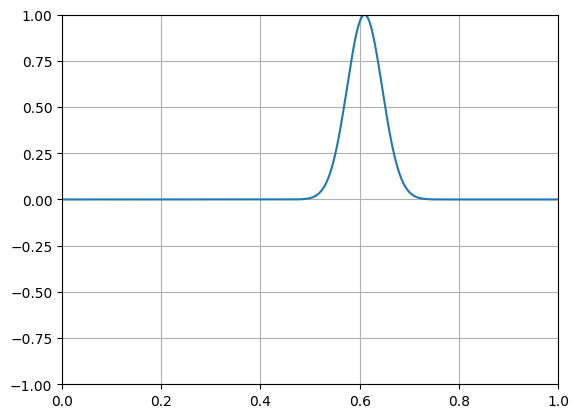

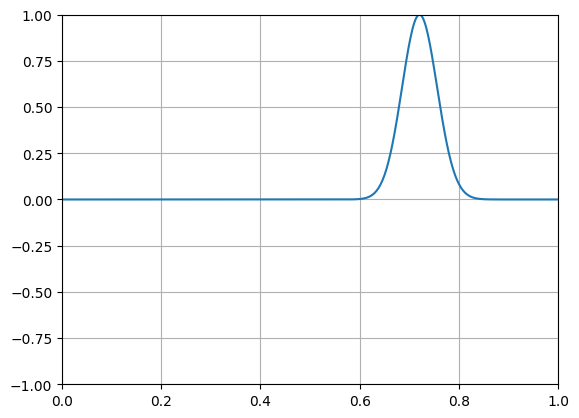

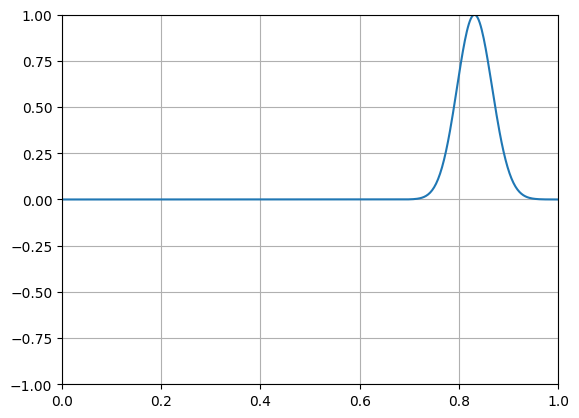

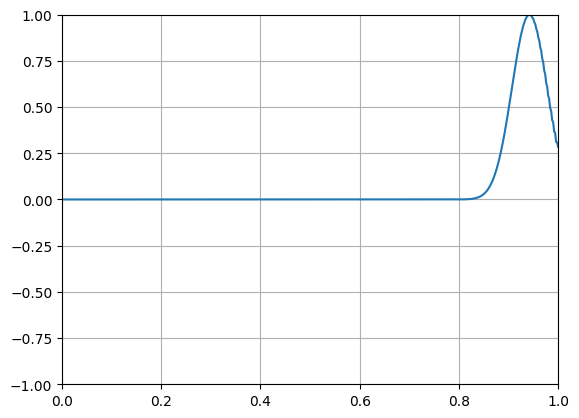

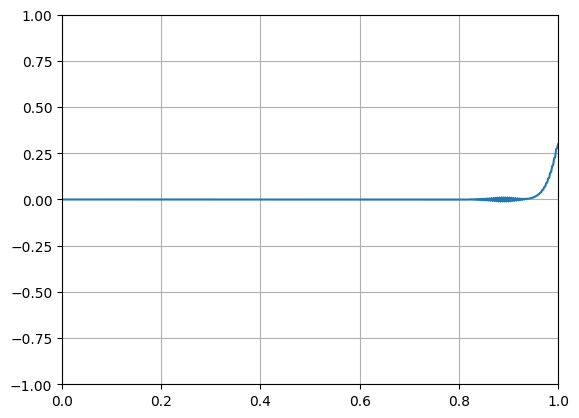

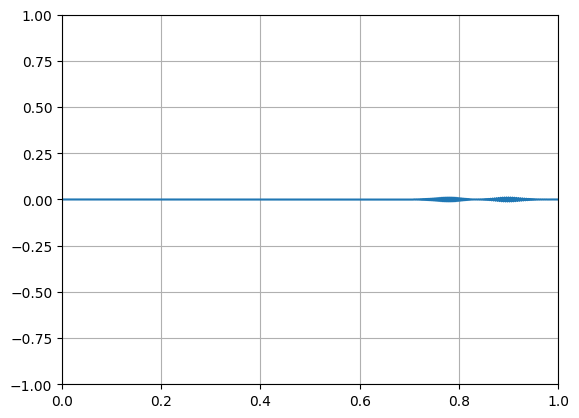

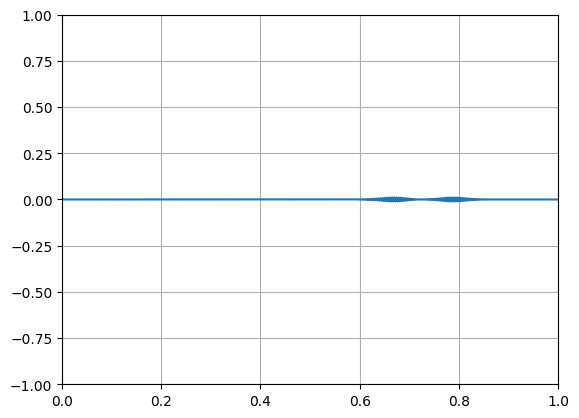

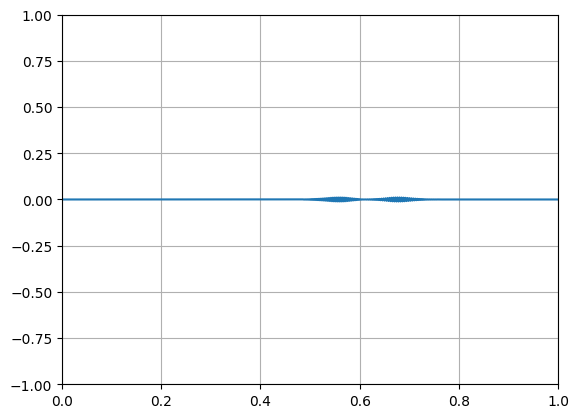

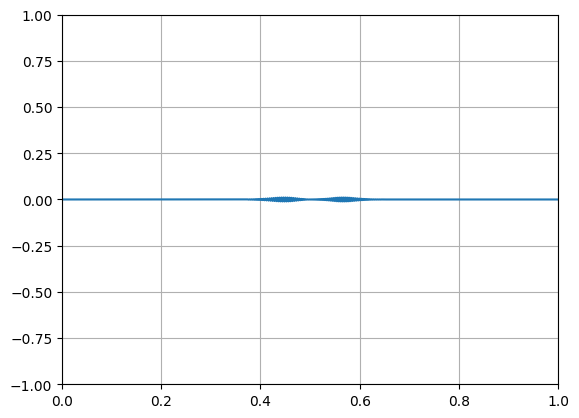

In [3]:
# graficamos la solucion
params={'legend.fontsize': 'x-large',
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}

# time skip
Ndt=111

# labels
plt.xlabel(r" $x$")
plt.ylabel(r"desplazamiento")

# title
plt.title(r"curvas  de onda")

X = np.linspace(a,b,w.shape[0])

for  j in range(0, nt, Ndt):
    t = j*dt + t0

    plt.plot(X, w[:, j], label=str(round(t,1)) + ' seg')
    plt.axis([0,1.0, -1, 1])
    plt.grid()
    plt.show()

In [4]:
# animation


In [5]:
from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axes, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((a, b))
ax.set_ylim((-1, 1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function. This is called sequentially
def animate(j):
    x = np.linspace(a, b, w.shape[0])
    y = w[:, j]
    line.set_data(x, y)
    return line,

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20, blit=True)

# Save the animation as an HTML file or display it in the notebook
anim.save('advection_animation.html', writer='html')

# To display in the notebook
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

#  Fenomeno de dispersion  numerica.
Recuerde el ejemplo del peloton de ciclistas. Cuando van en plan van todos juntos, cuando  comienza la loma se **dispersan**. Los mas livianos suben mas rapido, los mas pesados mas lento.

**Dispersion**: Diferentes numeros de onda $k$ viajan a distanta velocidad.

* **Fisica**: Es el fen'omeno puramente fisico. Lo que se vera en un pantano.

* **Numerica**: Es debida a la forma como se discretiza la ecuacion de onda.

**Definiciones**:
* Velocidad de fase
$$v_f = \frac{\omega}{k}  $$
* Velocidad de grupo
$$v_f = \frac{\partial \omega}{\partial k}  $$

Si no hay dispersion $v_f=v_g=\omega/k$. Pero en general la dispersion existe.

Expliquemos mejor.
Recuerde la ecuacion de onda

Ignoramos la fuente.
$$\frac{\partial^2 u}{\partial x^2} - \frac{1}{c^2} \frac{\partial^2 u}{\partial  t^2} = 0  $$

Podemos sacar la tranformada doble de Fourier de $x \to k$ y $t \to \omega$. Si por alguna razon no recuerda simplemente ausma que la solucion es de la forma  

$$u(x,t,k, \omega) = A \mathrm{e}^{\mathrm{i}(kx - \omega t) } $$
si hace esto, poner esta soucion en la ecuacion de onda obtiene

$$A \left ( -k^2 + \frac{1}{c^2} \omega^2 \right ) = 0  $$
Si $A \ne 0$
Tenemos

$$k^2 = \frac{1}{c^2} \omega^2 $$
A esto se le llama la **relacion de dispersion** de la onda acustica.

Soluciones

$$\omega = \pm c k $$
La relacion de dispersion muestra la dependencia entre $\omega$ y $k$

**Problema**: Halle la velocidad de fase y de grupo de esta ecuacion de onda.

* **fase**:
$$v_f = \frac{\omega}{k} = \pm c $$

* **grupo**:
$$v_g = \frac{\partial \omega}{\partial c} = \pm c $$

O sea que esta ecuacion no es **fisicamente** dispersiva. La velocidad de fase= velocidad de grupo = $c$.

Vamos a ver como la dispersion si existe (numerica).

Tomemos el siguiente esquema de la ecuacion de onda

$$w_{i j+1} = \gamma^2 w_{i-1 j} + 2(1  - \gamma^2) w_{ij} - w_{i j-1} \tag{9}$$

Recuerde que si no queremos tomar transformadas de Fourier, simplemente reemplazmos por la Ecuacion de igual forma que hicimos el analisis de estabilidad de von Neumann o usamos estas reglas.

$$u(x, t + \Delta t) \to \mathrm{e}^{-\mathrm{i} \omega \Delta t} U(k, \omega) $$
$$u(x + \Delta x,   t ) \to \mathrm{e}^{-\mathrm{i} k  \Delta x} U(k, \omega) $$
Se puden combinar los dos.
La Ecuacion (9) queda

$$W_{ij} (
    \mathrm{e}^{\mathrm{i} \omega \Delta t}
    + \mathrm{e}^{-\mathrm{i} \omega \Delta t}  )
    = \left (  
        \gamma^2  \mathrm{e}^{-\mathrm{i} k \Delta x}
        -2 (1 - \gamma^2) + \gamma^2 \mathrm{e}^{\mathrm{i} k \Delta x}
        \right )  W_{ij}
    $$